### Linear Regression in one variable in sklearn
In this notebook we are going to implement Linear Regression on a small dataset.

In [13]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We are using a small dataset from [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html). This a data about Cricket Chirps Vs. Temperature. We will use linear regression to fit model.

In [14]:
# loading data
data = pd.read_excel('slr02.xls', engine='xlrd')

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


Now we look into data we see there are two columns X and Y. 

were X = chirps/sec for the striped ground cricket

and Y = temperature in degrees Fahrenheit

In [15]:
data

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


In [16]:
type(data)

pandas.core.frame.DataFrame

In [17]:
# data we got are in pandas dataframe format
# we need to cast it in numpy array for calulations
X = np.array(data.X)
y = np.array(data.Y)

In [18]:
# visualise casted data
X,y

(array([20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
        15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
        15.        , 17.20000076, 16.        , 17.        , 14.39999962]),
 array([88.59999847, 71.59999847, 93.30000305, 84.30000305, 80.59999847,
        75.19999695, 69.69999695, 82.        , 69.40000153, 83.30000305,
        79.59999847, 82.59999847, 80.59999847, 83.5       , 76.30000305]))

In [19]:
# function for plotting data points
def plot_points(X, y, xlabel, ylabel):
    """Plot points given X and Y co-ordinates and labels them"""
    plt.plot(X, y, 'o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

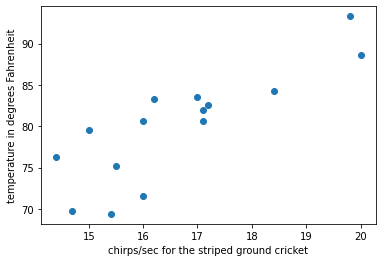

In [20]:
# plot data points
plot_points(X, y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit")

In [21]:
from sklearn.linear_model import SGDRegressor

In [22]:
X, X.shape

(array([20.        , 16.        , 19.79999924, 18.39999962, 17.10000038,
        15.5       , 14.69999981, 17.10000038, 15.39999962, 16.20000076,
        15.        , 17.20000076, 16.        , 17.        , 14.39999962]),
 (15,))

In [25]:
# to shape into matrix
X = X.reshape(-1,1)

In [26]:
X, X.shape

(array([[20.        ],
        [16.        ],
        [19.79999924],
        [18.39999962],
        [17.10000038],
        [15.5       ],
        [14.69999981],
        [17.10000038],
        [15.39999962],
        [16.20000076],
        [15.        ],
        [17.20000076],
        [16.        ],
        [17.        ],
        [14.39999962]]),
 (15, 1))

In [99]:
# Training the model
reg = SGDRegressor(loss='squared_error', alpha=0.001, max_iter=20000)
reg.fit(X, y)

SGDRegressor(alpha=0.001, l1_ratio=1, max_iter=20000, penalty='elasticnet',
             random_state=5)

In [100]:
# R2 Score
reg.score(X, y)

0.22214574214495353

In [101]:
# Slope
reg.coef_

array([4.53230128])

In [102]:
# Intercept
reg.intercept_

array([0.58806895])

In [103]:
# plots line of regression
def draw_line(X, m, c):
    """Plot a line from slope and intercept"""
    x_vals = X
    y_vals = m * X + c
    plt.plot(x_vals, y_vals, '--')

In [104]:
# plots points and lines
def draw_points_and_lines(X, y, xlabel, ylabel, m, c):
    """Draws lines and points"""
    plot_points(X, y, xlabel, ylabel)
    draw_line(X, m, c)

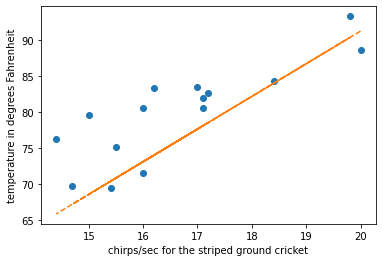

In [105]:
# draw line of regression without traing model
draw_points_and_lines(X.flatten(), y, "chirps/sec for the striped ground cricket", "temperature in degrees Fahrenheit", reg.coef_, reg.intercept_)

In [106]:
# Predict
reg.predict([[14.9]])

array([68.11935806])

### Save and load model

In [ ]:
import joblib

In [ ]:
# save to binary file
joblib.dump(reg, 'reg.pkl')

In [ ]:
# load saved model
reg2 = joblib.load('reg.pkl')

In [ ]:
reg2.predict([[15]])